In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import yfinance as yf
import hvplot.pandas
from pathlib import Path
from finta import TA
import matplotlib.pyplot as plt
import quantstats as qs
import itertools
from IPython.display import clear_output
from collections import Counter as CounterClass

In [2]:
# Read in the CSV file as a Pandas DataFrame
full_df = pd.read_csv(
    Path('./output_no_seg.csv'))

# Review the DataFrame
full_df

,Unnamed: 0,Buy Signals,Sell Signals,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe,Ticker,Beat BNH
0,357,"['EMA20_Signal', 'MACD_Signal', 'SQZ_Signal', ...",['MACD_Signal'],0.127512,1.542081,0.358442,0.355739,0.348709,0.562167,-0.011994,AAL,True
1,116,"['EMA20_Signal', 'SQZ_Signal', 'Segmentation_S...",['MACD_Signal'],0.127512,1.542081,0.358442,0.355739,0.348709,0.562167,-0.011994,AAL,True
2,112,"['EMA20_Signal', 'MACD_Signal', 'Segmentation_...",['MACD_Signal'],0.128637,1.537144,0.363031,0.354341,0.348709,0.562167,-0.011994,AAL,True
3,6,"['EMA20_Signal', 'Segmentation_Signal']",['MACD_Signal'],0.128637,1.537144,0.363031,0.354341,0.348709,0.562167,-0.011994,AAL,True
4,230,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...","['BB_Sell_Signal', 'ADX_Signal']",0.110403,1.534669,0.301963,0.365617,0.348709,0.562167,-0.011994,AAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...
89770,671,"['MACD_Signal', 'SQZ_Signal', 'CHAIKIN_Signal'...",['BB_Sell_Signal'],-0.105385,0.475321,0.372243,-0.283109,0.777489,0.633438,0.216842,ZM,False
89771,391,"['SQZ_Signal', 'CHAIKIN_Signal', 'MFI_Signal',...",['BB_Sell_Signal'],-0.119710,0.444908,0.375422,-0.318867,0.777489,0.633438,0.216842,ZM,False
89772,146,"['CHAIKIN_Signal', 'MFI_Signal', 'Segmentation...",['BB_Sell_Signal'],-0.119710,0.444908,0.375422,-0.318867,0.777489,0.633438,0.216842,ZM,False
89773,142,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...",['BB_Sell_Signal'],-0.242102,0.240498,0.428533,-0.564955,0.777489,0.633438,0.216842,ZM,False


In [3]:
# Read in the CSV file as a Pandas DataFrame
t30_df = pd.read_csv(
    Path('././output_top_30.csv'))

# Review the DataFrame
t30_df

,Unnamed: 0,Buy Signals,Sell Signals,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe,Ticker,Beat BNH
0,142,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...",['BB_Sell_Signal'],0.085291,1.357670,0.279645,0.304997,0.348709,0.562167,-0.011994,AAL,True
1,20,"['MFI_Signal', 'Segmentation_Signal']",['BB_Sell_Signal'],0.085291,1.357670,0.279645,0.304997,0.348709,0.562167,-0.011994,AAL,True
2,472,"['EMA20_Signal', 'MACD_Signal', 'MFI_Signal', ...","['MACD_Signal', 'ADX_Signal']",0.000000,1.000000,0.000000,NaN,0.348709,0.562167,-0.011994,AAL,True
3,612,"['MACD_Signal', 'SQZ_Signal', 'MFI_Signal', 'S...","['BB_Sell_Signal', 'EMA20_Signal', 'MACD_Signa...",0.000000,1.000000,0.000000,NaN,0.348709,0.562167,-0.011994,AAL,True
4,594,"['SQZ_Signal', 'CHAIKIN_Signal', 'MFI_Signal',...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.000000,1.000000,0.000000,NaN,0.348709,0.562167,-0.011994,AAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...
89770,291,"['SQZ_Signal', 'CHAIKIN_Signal', 'Segmentation...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.004496,0.928605,0.208012,0.021614,0.777489,0.633438,0.216842,ZM,True
89771,75,"['SQZ_Signal', 'Segmentation_Signal']","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.002405,0.920337,0.208057,0.011559,0.777489,0.633438,0.216842,ZM,True
89772,558,"['EMA20_Signal', 'MACD_Signal', 'SQZ_Signal', ...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.002405,0.920337,0.208057,0.011559,0.777489,0.633438,0.216842,ZM,True
89773,267,"['EMA20_Signal', 'SQZ_Signal', 'Segmentation_S...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.002405,0.920337,0.208057,0.011559,0.777489,0.633438,0.216842,ZM,True


In [4]:
# Read in the CSV file as a Pandas DataFrame
t60_df = pd.read_csv(
    Path('./output_top_60.csv'))

# Review the DataFrame
t60_df

,Unnamed: 0,Buy Signals,Sell Signals,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe,Ticker,Beat BNH
0,116,"['EMA20_Signal', 'SQZ_Signal', 'Segmentation_S...",['MACD_Signal'],0.116201,1.513370,0.333939,0.347971,0.348709,0.562167,-0.011994,AAL,True
1,357,"['EMA20_Signal', 'MACD_Signal', 'SQZ_Signal', ...",['MACD_Signal'],0.116201,1.513370,0.333939,0.347971,0.348709,0.562167,-0.011994,AAL,True
2,145,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...",['ADX_Signal'],0.065449,1.495563,0.089723,0.729451,0.348709,0.562167,-0.011994,AAL,True
3,56,"['MFI_Signal', 'Segmentation_Signal']","['BB_Sell_Signal', 'ADX_Signal']",0.065449,1.495563,0.089723,0.729451,0.348709,0.562167,-0.011994,AAL,True
4,230,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...","['BB_Sell_Signal', 'ADX_Signal']",0.065449,1.495563,0.089723,0.729451,0.348709,0.562167,-0.011994,AAL,True
...,...,...,...,...,...,...,...,...,...,...,...,...
89770,808,"['EMA20_Signal', 'MACD_Signal', 'SQZ_Signal', ...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.012148,0.954025,0.214248,0.056699,0.777489,0.633438,0.216842,ZM,True
89771,267,"['EMA20_Signal', 'SQZ_Signal', 'Segmentation_S...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.010840,0.946720,0.216543,0.050060,0.777489,0.633438,0.216842,ZM,True
89772,558,"['EMA20_Signal', 'MACD_Signal', 'SQZ_Signal', ...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.010840,0.946720,0.216543,0.050060,0.777489,0.633438,0.216842,ZM,True
89773,279,"['MACD_Signal', 'SQZ_Signal', 'Segmentation_Si...","['EMA20_Signal', 'MACD_Signal', 'ADX_Signal']",0.010840,0.946720,0.216543,0.050060,0.777489,0.633438,0.216842,ZM,True


In [5]:
full_df.describe()

,Unnamed: 0,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe
count,89775.000000,89775.000000,89775.000000,89775.000000,46909.000000,89775.000000,89775.000000,89775.000000
mean,472.000000,0.033630,1.280270,0.105531,0.246837,2.441361,0.406443,0.448583
std,272.799369,0.088328,1.339820,0.139948,0.367494,2.473124,0.198008,0.296946
min,0.000000,-0.344114,0.069529,0.000000,-1.376166,0.103279,0.195299,-0.469444
25%,236.000000,0.000000,1.000000,0.000000,0.005699,0.952545,0.279872,0.216842
50%,472.000000,0.000000,1.000000,0.066546,0.256003,1.939932,0.354810,0.510539
75%,708.000000,0.041721,1.186222,0.173249,0.488554,2.677552,0.485870,0.648312
max,944.000000,1.323046,79.468177,1.486350,1.591387,16.058881,1.656134,1.088601


In [6]:
full_df.dtypes

Unnamed: 0                  int64
Buy Signals                object
Sell Signals               object
Algo Annualized Return    float64
Algo Cumulative Return    float64
Algo Annual Volatility    float64
Algo Sharpe Ratio         float64
BNH Cumulative Return     float64
BNH Volatility            float64
BNH Sharpe                float64
Ticker                     object
Beat BNH                     bool
dtype: object

In [7]:

full_df2 = full_df.loc[(full_df['Algo Sharpe Ratio'] >= 1) & (full_df['Beat BNH'] == True)]
full_df2.describe()

,Unnamed: 0,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,325.033333,0.452697,13.611012,0.423850,1.069373,6.934662,0.627064,0.783249
std,243.586759,0.201661,11.399431,0.190267,0.055534,3.488233,0.272614,0.162321
min,0.000000,0.088737,1.757743,0.071492,1.001045,0.404956,0.287805,0.334597
25%,120.750000,0.301826,5.582783,0.282485,1.025892,3.760691,0.435520,0.685272
50%,301.500000,0.543225,14.770444,0.505321,1.064467,9.163044,0.614880,0.797802
75%,473.250000,0.599884,19.060204,0.552719,1.103778,9.163044,0.848851,0.797802
max,900.000000,1.323046,79.468177,1.291244,1.273630,16.058881,1.656134,1.088601


In [8]:
full_df3 = full_df.loc[(full_df['Algo Sharpe Ratio'] >= 1.1)]
full_df3.describe()

,Unnamed: 0,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,359.686411,0.258539,5.853050,0.208562,1.272752,7.255794,0.390258,0.996146
std,251.653157,0.134208,5.589706,0.123780,0.121393,3.116004,0.162547,0.099752
min,1.000000,0.088737,1.757743,0.071492,1.100321,1.431774,0.265374,0.334597
25%,151.250000,0.164487,2.761617,0.134950,1.185707,5.918821,0.306584,0.961758
50%,320.500000,0.218404,3.826206,0.157636,1.257388,5.918821,0.306584,1.040641
75%,544.750000,0.277876,5.258715,0.199234,1.345745,5.918821,0.306584,1.040641
max,924.000000,0.701205,31.589210,0.624231,1.591387,16.058881,0.848851,1.088601


In [9]:
#drop duplicate teams but keeps row with max points
full_df4 = full_df2.sort_values('Algo Sharpe Ratio', ascending=False).drop_duplicates('Ticker').sort_index()

#view DataFrame
full_df4

,Unnamed: 0,Buy Signals,Sell Signals,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe,Ticker,Beat BNH
18910,230,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...","['BB_Sell_Signal', 'ADX_Signal']",0.088737,1.757743,0.071492,1.241216,1.431774,0.312085,0.334597,CAH,True
23625,142,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...",['BB_Sell_Signal'],0.193962,3.260074,0.163535,1.186057,2.154667,0.287805,0.552220,CSX,True
46308,31,"['EMA20_Signal', 'Segmentation_Signal']","['BB_Sell_Signal', 'MACD_Signal']",1.157742,73.351134,1.065786,1.086279,0.404956,1.656134,0.610065,MARA,True
51975,10,"['MACD_Signal', 'Segmentation_Signal']",['MACD_Signal'],0.353403,7.638599,0.294384,1.200484,3.760691,0.435520,0.685272,MPC,True
53897,150,"['EMA50_Signal', 'EMA20_Signal', 'Segmentation...","['BB_Sell_Signal', 'EMA20_Signal']",0.614078,8.422009,0.556304,1.103854,7.118187,0.762755,0.933032,MRNA,True
57648,90,"['EMA50_Signal', 'EMA20_Signal', 'Segmentation...",['BB_Sell_Signal'],0.310644,5.808311,0.288716,1.075949,5.579424,0.289693,1.052640,MSFT,True
61429,26,"['EMA50_Signal', 'Segmentation_Signal']","['BB_Sell_Signal', 'ADX_Signal']",0.154278,2.568839,0.144189,1.069972,2.058501,0.312749,0.508569,NKE,True
62370,379,"['MACD_Signal', 'SQZ_Signal', 'CHAIKIN_Signal'...",['BB_Sell_Signal'],0.553162,16.193166,0.505323,1.094670,16.058881,0.508921,1.088601,NVDA,True
68056,712,"['EMA50_Signal', 'MACD_Signal', 'SQZ_Signal', ...","['BB_Sell_Signal', 'MACD_Signal']",0.614376,24.490357,0.530096,1.158990,9.163044,0.848851,0.797802,PLUG,True
81272,398,"['EMA50_Signal', 'EMA20_Signal', 'MACD_Signal'...","['EMA20_Signal', 'MACD_Signal']",0.472513,14.104298,0.370997,1.273630,13.905188,0.614880,0.961758,TSLA,True


In [10]:
#drop duplicate teams but keeps row with max points
full_df5 = full_df3.sort_values('Algo Sharpe Ratio', ascending=False).drop_duplicates('Ticker').sort_index()

#view DataFrame
full_df5

,Unnamed: 0,Buy Signals,Sell Signals,Algo Annualized Return,Algo Cumulative Return,Algo Annual Volatility,Algo Sharpe Ratio,BNH Cumulative Return,BNH Volatility,BNH Sharpe,Ticker,Beat BNH
951,112,"['EMA20_Signal', 'MACD_Signal', 'Segmentation_...",['MACD_Signal'],0.274634,5.469268,0.172575,1.591387,5.918821,0.306584,1.040641,AAPL,False
18910,230,"['SQZ_Signal', 'MFI_Signal', 'Segmentation_Sig...","['BB_Sell_Signal', 'ADX_Signal']",0.088737,1.757743,0.071492,1.241216,1.431774,0.312085,0.334597,CAH,True
23626,20,"['MFI_Signal', 'Segmentation_Signal']",['BB_Sell_Signal'],0.193962,3.260074,0.163535,1.186057,2.154667,0.287805,0.552220,CSX,True
37846,410,"['EMA50_Signal', 'EMA20_Signal', 'CHAIKIN_Sign...","['EMA20_Signal', 'MACD_Signal']",0.134803,2.307090,0.118521,1.137372,2.767202,0.265374,0.721161,HD,False
51975,10,"['MACD_Signal', 'Segmentation_Signal']",['MACD_Signal'],0.353403,7.638599,0.294384,1.200484,3.760691,0.435520,0.685272,MPC,True
53896,24,"['EMA50_Signal', 'Segmentation_Signal']","['BB_Sell_Signal', 'EMA20_Signal']",0.614078,8.422009,0.556304,1.103854,7.118187,0.762755,0.933032,MRNA,True
62404,111,"['EMA20_Signal', 'MACD_Signal', 'Segmentation_...",['EMA20_Signal'],0.371729,7.972923,0.331946,1.119849,16.058881,0.508921,1.088601,NVDA,False
68057,694,"['EMA50_Signal', 'EMA20_Signal', 'SQZ_Signal',...","['BB_Sell_Signal', 'MACD_Signal']",0.614376,24.490357,0.530096,1.158990,9.163044,0.848851,0.797802,PLUG,True
81272,398,"['EMA50_Signal', 'EMA20_Signal', 'MACD_Signal'...","['EMA20_Signal', 'MACD_Signal']",0.472513,14.104298,0.370997,1.273630,13.905188,0.614880,0.961758,TSLA,True


In [11]:

#full_df4.hvplot.scatter(x='Algo Sharpe Ratio', y='Algo Annual Volatility', 
#                                  color = 'Algo Sharpe Ratio', hover_color='Ticker',
#                                  legend='left', height=500, width=1000,
#                                  title='Test',
#                                  hover_cols=['Ticker','Algo Sharpe/Vol'],
#                                  size = 77,
#                                  cmap = 'cool')


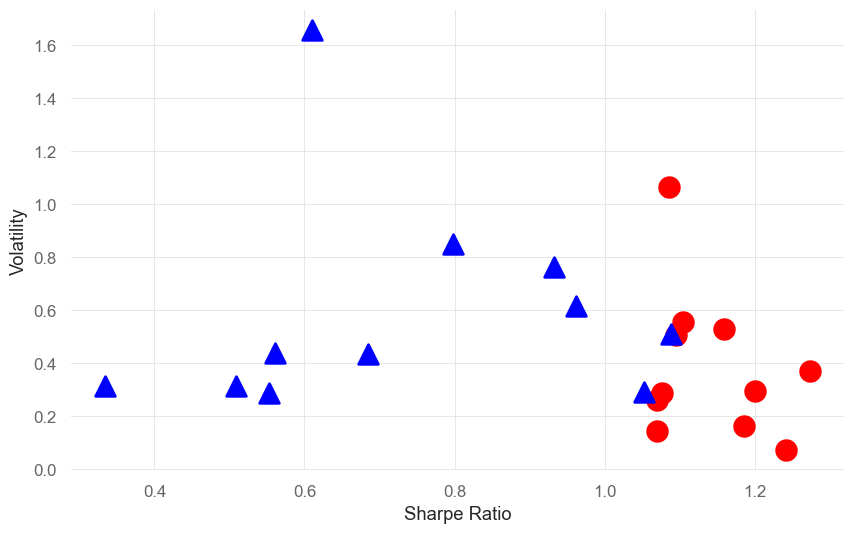

In [12]:
plt.scatter(full_df4['Algo Sharpe Ratio'], full_df4['Algo Annual Volatility'], c="red",
            linewidths=2,
            marker="o",
            edgecolor="red",
            s=200)

plt.scatter(full_df4['BNH Sharpe'], full_df4['BNH Volatility'], c="blue",
            linewidths=2,
            marker="^",
            edgecolor="blue",
            s=200)

plt.xlabel("Sharpe Ratio")
plt.ylabel("Volatility")
plt.show()


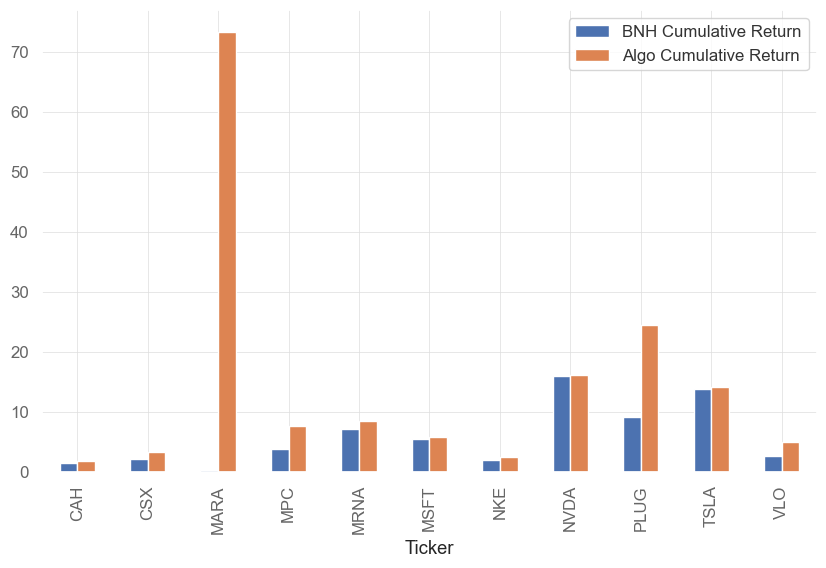

In [13]:
dfa = pd.DataFrame(full_df4, columns=['Ticker','BNH Cumulative Return', 'Algo Cumulative Return'])

# Set the 'Name' column as the index
dfa.set_index('Ticker', inplace=True)

# Create the bar chart
ax = dfa.plot.bar()

In [14]:
full_df4.hvplot.scatter(x='Algo Annual Volatility', y='Algo Annualized Return', 
                                  color = 'Algo Sharpe Ratio', hover_color='Ticker',
                                  legend='left', height=500, width=1000,
                                  title='Test',
                                  hover_cols=['Ticker','Algo Cumulative Return'],
                                  size = 77,
                                  cmap = 'cool')

:Scatter   [Algo Annual Volatility]   (Algo Annualized Return,Algo Sharpe Ratio,Ticker,Algo Cumulative Return)

In [15]:
#full_df5.hvplot.scatter(x='Algo Sharpe Ratio', y='Algo Annual Volatility', 
#                                  color = 'Algo Sharpe Ratio', hover_color='Ticker',
#                                  legend='left', height=500, width=1000,
#                                  title='Test',
#                                  hover_cols=['Ticker','Algo Cumulative Return'],
#                                  size = 77,
#                                  cmap = 'cool')

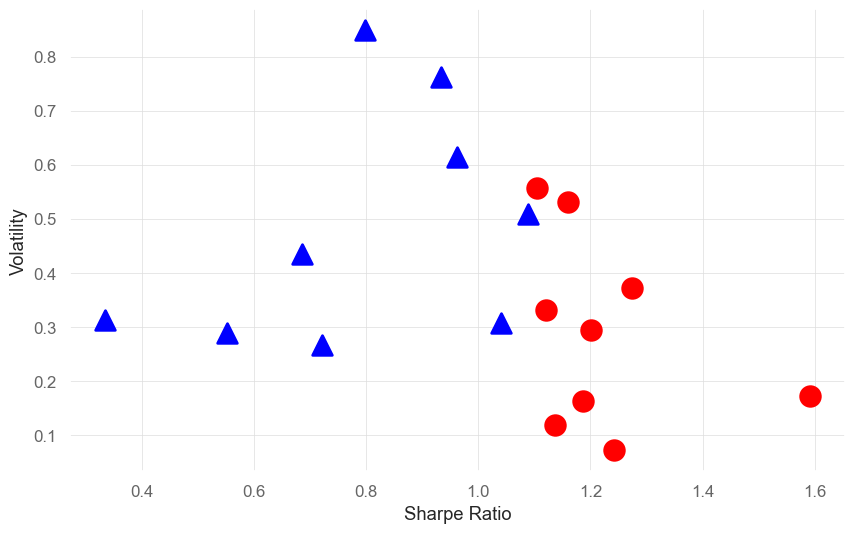

In [16]:
plt.scatter(full_df5['Algo Sharpe Ratio'], full_df5['Algo Annual Volatility'], c="red",
            linewidths=2,
            marker="o",
            edgecolor="red",
            s=200)

plt.scatter(full_df5['BNH Sharpe'], full_df5['BNH Volatility'], c="blue",
            linewidths=2,
            marker="^",
            edgecolor="blue",
            s=200)

plt.xlabel("Sharpe Ratio")
plt.ylabel("Volatility")
plt.show()

In [17]:
#bar = full_df5.hvplot(
#                x="Ticker",
#                y="Algo Annualized Return",
#                kind="bar",
#                color="tomato",
#                height=500, width=500,
#                ylim=(0, 1.2),
#                ylabel="Ticker",
#                title="Annualized Returns")

#bar

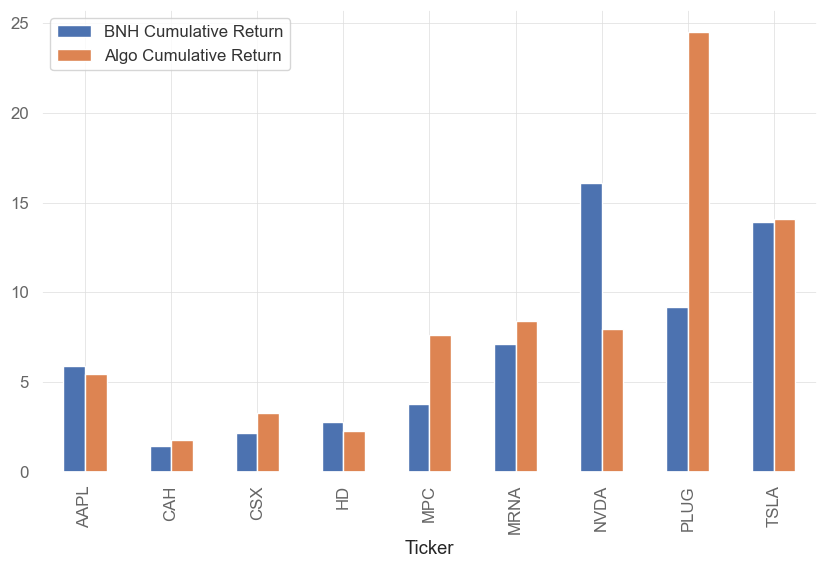

In [18]:
dfa = pd.DataFrame(full_df5, columns=['Ticker','BNH Cumulative Return', 'Algo Cumulative Return'])

# Set the 'Name' column as the index
dfa.set_index('Ticker', inplace=True)

# Create the bar chart
ax = dfa.plot.bar()

In [19]:
full_df5.hvplot.scatter(x='Algo Annual Volatility', y='Algo Annualized Return', 
                                  color = 'Algo Sharpe Ratio', hover_color='Ticker',
                                  legend='left', height=500, width=1000,
                                  title='Test',
                                  hover_cols=['Ticker','Algo Cumulative Return'],
                                  size = 77,
                                  cmap = 'cool')

:Scatter   [Algo Annual Volatility]   (Algo Annualized Return,Algo Sharpe Ratio,Ticker,Algo Cumulative Return)

In [46]:

# Assuming full_df4 is your DataFrame
df_port = full_df4.copy()
df_port.set_index('Ticker', inplace=True)

df_port['algo_port_ret'] = df_port['Algo Cumulative Return'] * (1/11)
df_port['bnh_port_ret'] = df_port['BNH Cumulative Return'] * (1/11)

df_port2 = {}  # Use a dictionary here instead of a list
df_port2['algo_sum'] = df_port['algo_port_ret'].cumsum()
df_port2['bnh_sum'] = df_port['bnh_port_ret'].cumsum()

df_port2

{'algo_sum': Ticker
 CAH      0.159795
 CSX      0.456165
 MARA     7.124450
 MPC      7.818868
 MRNA     8.584505
 MSFT     9.112534
 NKE      9.346065
 NVDA    10.818171
 PLUG    13.044567
 TSLA    14.326776
 VLO     14.783244
 Name: algo_port_ret, dtype: float64,
 'bnh_sum': Ticker
 CAH     0.130161
 CSX     0.326040
 MARA    0.362854
 MPC     0.704735
 MRNA    1.351843
 MSFT    1.859064
 NKE     2.046200
 NVDA    3.506098
 PLUG    4.339102
 TSLA    5.603210
 VLO     5.846624
 Name: bnh_port_ret, dtype: float64}

In [47]:

# Assuming full_df4 is your DataFrame
df_port3 = full_df5.copy()
df_port3.set_index('Ticker', inplace=True)

df_port3['algo_port2_ret'] = df_port3['Algo Cumulative Return'] * (1/11)
df_port3['bnh_port2_ret'] = df_port3['BNH Cumulative Return'] * (1/11)

df_port3['algo_port2_vol'] = df_port3['Algo Cumulative Return'] * (1/11)
df_port3['bnh_port2_vol'] = df_port3['BNH Cumulative Return'] * (1/11)

df_port4 = {}  # Use a dictionary here instead of a list
df_port4['algo_sum2'] = df_port3['algo_port2_ret'].cumsum()
df_port4['bnh_sum2'] = df_port3['bnh_port2_ret'].cumsum()

df_port4

{'algo_sum2': Ticker
 AAPL    0.497206
 CAH     0.657001
 CSX     0.953371
 HD      1.163107
 MPC     1.857525
 MRNA    2.623162
 NVDA    3.347973
 PLUG    5.574369
 TSLA    6.856578
 Name: algo_port2_ret, dtype: float64,
 'bnh_sum2': Ticker
 AAPL    0.538075
 CAH     0.668236
 CSX     0.864115
 HD      1.115679
 MPC     1.457560
 MRNA    2.104667
 NVDA    3.564566
 PLUG    4.397570
 TSLA    5.661678
 Name: bnh_port2_ret, dtype: float64}

In [59]:
df_port5 = pd.DataFrame(df_port2)
df_port6 = pd.DataFrame(df_port4)

df_port5 = df_port5.iloc[-1]

df_port5.hvplot.bar(width = 800,
             height = 500,
             color = ['green', 'red'],
             hover_color = 'blue',
             title = 'Cumulative Algo Trades Portfolio Returns vs. Select Buy and Hold Portfolio Returns vs S&P 500')

:Bars   [index]   (VLO)

In [60]:
df_port6 = df_port6.iloc[-1]

df_port6.hvplot.bar(width = 800,
             height = 500,
             color = ['green', 'red'],
             hover_color = 'blue',
             title = 'Cumulative Algo Trades Portfolio II Returns vs. Select Buy and Hold Portfolio Returns vs S&P 500')

:Bars   [index]   (TSLA)